In [58]:
from os.path import join

image_dir = './train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                            '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                            '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                            '0e79be614f12deb4f7cae18614b7391b.jpg',
                            '000bec180eb18c7604dcecc8fe0dba07.jpg',
                            '4bd83d80fbab26a3a1f0d73785cf7af6.jpg']]

In [59]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from IPython.display import Image, display

In [60]:
image_size = 224
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [61]:
my_model=ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data=read_and_prep_images(img_paths)
preds=my_model.predict(test_data)

In [62]:
most_likely_labels = decode_predictions(preds, top=3)

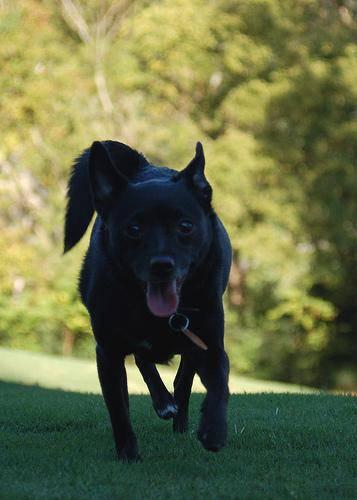

[('n02093256', 'Staffordshire_bullterrier', 0.37935922), ('n02099712', 'Labrador_retriever', 0.26180416), ('n02093428', 'American_Staffordshire_terrier', 0.21227585)]


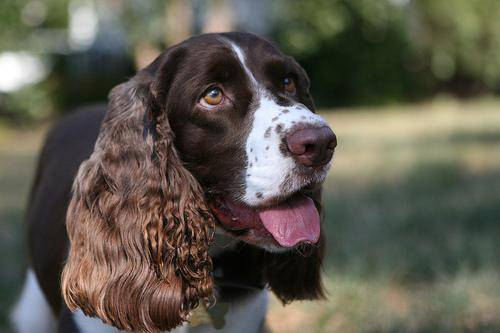

[('n02102040', 'English_springer', 0.94379747), ('n02101556', 'clumber', 0.023635058), ('n02102480', 'Sussex_spaniel', 0.009090514)]


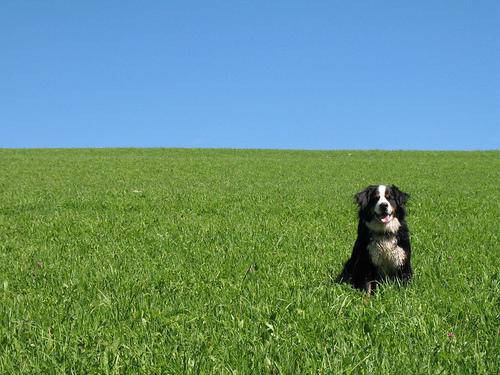

[('n02107683', 'Bernese_mountain_dog', 0.45761442), ('n02100735', 'English_setter', 0.25876305), ('n02102040', 'English_springer', 0.123042926)]


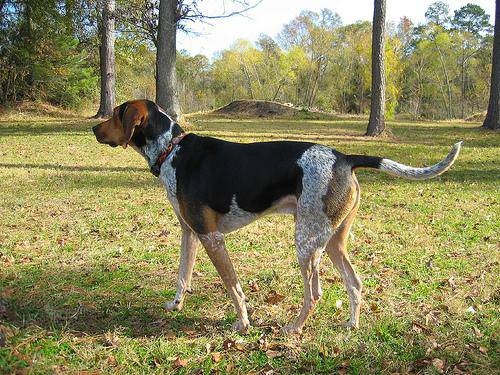

[('n02088632', 'bluetick', 0.99174434), ('n02089867', 'Walker_hound', 0.006791502), ('n02089973', 'English_foxhound', 0.00085084443)]


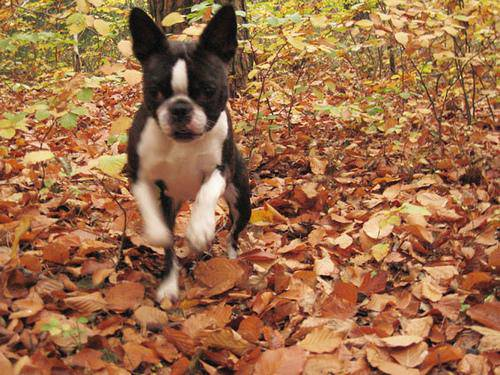

[('n02096585', 'Boston_bull', 0.99069256), ('n02113186', 'Cardigan', 0.0039028528), ('n02108915', 'French_bulldog', 0.0017027649)]


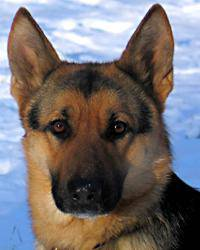

[('n02106662', 'German_shepherd', 0.989693), ('n02105412', 'kelpie', 0.0038146381), ('n02115641', 'dingo', 0.0013528381)]


In [63]:
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])